In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X = dataset.iloc[:,1:2].values # To make X as matrix we add 2 and as we know upper bound is excluded
Y = dataset.iloc[:,-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
# Implementing normal Linear Regression to compare

from sklearn.linear_model import LinearRegression
L_regressor = LinearRegression()
L_regressor.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Now to apply polynomial Linear Regression we first have to change our X matrix to matrix of polynomials of X
# means power of X

from sklearn.preprocessing import PolynomialFeatures
P_regressor = PolynomialFeatures(degree=2)    # this regressor is only to make polynomial matrix
X_poly = P_regressor.fit_transform(X)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [26]:
# Doing regression again

L_reg_2 = LinearRegression() # this regressor is actual polynomial regressor as this is working on poly X
L_reg_2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

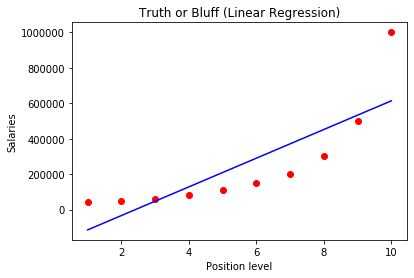

In [27]:
# Now we going to compare by ploting graph
# 1st plotting graph of linear regression

plt.scatter(X,Y, color = 'red')
plt.plot(X,L_regressor.predict(X),color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

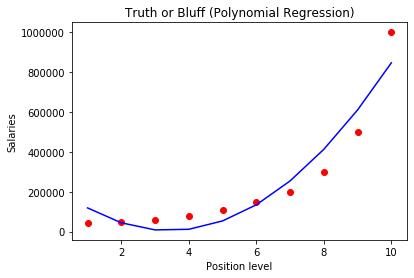

In [28]:
# Now we going to plot our polynomial regression model

plt.scatter(X,Y, color = 'red')
plt.plot(X,L_reg_2.predict(P_regressor.fit_transform(X)),color = 'blue') # Here we can use X_poly but to make it generalize 
                                            # or if we make any change in X in future then this statement will take care of it
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

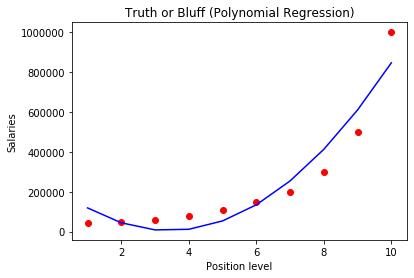

In [29]:
# To make curve more accurate we can increase the degree and also if we see this curve is combination of straight lines
# of one unit of levels we can divide them in further smaller part by doing below

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,Y, color = 'red')
plt.plot(X,L_reg_2.predict(P_regressor.fit_transform(X)),color = 'blue') # Here we can use X_poly but to make it generalize 
                                            # or if we make any change in X in future then this statement will take care of it
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()


In [31]:
# Now lets predict the salary for level 6.5 by both linear and polynomial

L_regressor.predict(np.array(6.5).reshape(1,-1))

array([330378.78787879])

In [35]:
L_reg_2.predict(P_regressor.fit_transform(np.array(6.5).reshape(1,-1)))

array([189498.10606061])

In [ ]:
# So we can see our polynomial regression give quite close result to 160K